### 랜덤 포레스트 하이퍼 파라미터
* n_estimators
    - 트리의 개수. default=10
    - 트리의 개수가 많이면 성능은 좋아지지만, 시간이 오래 걸릴수 있다.
* max_depth
    - 트리의 최대 깊이. default = None
    - 완벽하게 파라미터값이 결정될 때 까지 분할 또는 min_samples_split보자 작아질 때까지 분할
    - 깊이가 깊어지면 과대적합될 수 있으므로 적절히 제어 필요
* min_samples_leaf
    - 맆노드(자식노드가 없는 노드)가 되기 위해 최소한의 샘플 데이터 수
    - min_samples_split과 함께 과대적합 제어용도
    - 불균형 데이터가 있는 경우 작게 설정하는게 좋다
* min_samples_split
    - 노드를 분할하기 위한 최소한의 샘플 데이터수. default = 2
    - 과적합을 제어하는데 사용
    - 작게 설정할 수록 분할 노드가 많아져 과대적합 가능성 증가

![img](images/tree.png)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

df = pd.read_csv('data/titanic_cleaning.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [2]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare']
label = 'Survived';
# 1.문제와 정답 구분하기
X, y = df[features],df[label]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=62)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("train : ",rfc.score(X_train,y_train))
print("test : ",rfc.score(X_test,y_test))

train :  0.9845505617977528
test :  0.7877094972067039


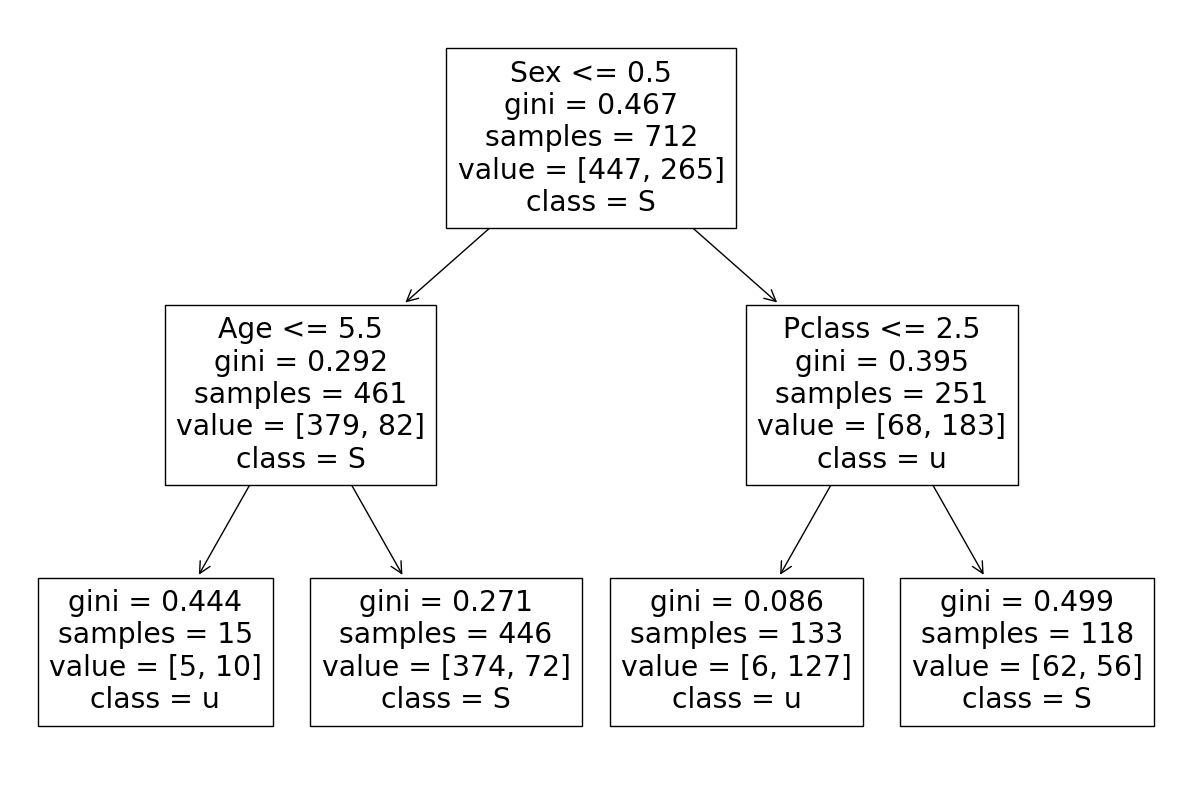

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#각 파라미터값을 넣고 확인하자.
#max_depth,min_samples_leaf,min_samples_split
clf = tree.DecisionTreeClassifier( max_depth=2 )
clf = clf.fit(X_train, y_train)    

fig = plt.figure(figsize=(15, 10), facecolor='white')
tree.plot_tree(clf,
          feature_names=features, ## 박스에 변수 이름 표시
          class_names=list(label), ## 클래스 이름(범주 이름)
         )
plt.show()
#지니계수 : 불순도라 표현하며, 
# 0-1사이 값으로 성별이 균등하면 0, 아니면 수치가 올라간다

In [8]:
# 트리수는 100, 깊이는 10, 단말노드가 4개가 되기 전, 샘플수는 
rfc = RandomForestClassifier(n_estimators=100, 
                             max_depth=10,
                             min_samples_leaf=4,
                             min_samples_split=100
                            )

rfc.fit(X_train, y_train)
print("train : ",rfc.score(X_train,y_train))
print("test : ",rfc.score(X_test,y_test))

train :  0.827247191011236
test :  0.8268156424581006


In [9]:
import numpy as np
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=62)
params = {
    'n_estimators':range(10,101,10),
    'max_depth' : range(4,11,2),
    'min_samples_leaf' : range(5,21,5),
    'min_samples_split' : range(4,21,4)
}

rfc = RandomForestClassifier()

grid_cv = GridSearchCV(rfc, param_grid = params, cv=3, n_jobs = -1)# n_jobs : 사용할 코어의 수 . -1인경우 모든 코어를 사용함
grid_cv.fit(X_train, y_train)
print('최적의 하이퍼 파라미터 : ', grid_cv.best_params_)

print("train : ",grid_cv.score(X_train,y_train))
print("test : ",grid_cv.score(X_test,y_test))


최적의 하이퍼 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 40}
train :  0.8735955056179775
test :  0.8156424581005587


In [10]:
# 최적의 하이퍼파라미터로 다시 모델생성
# 하이퍼 파라미터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=62)
rfc = RandomForestClassifier( max_depth=10,
                             min_samples_leaf=5, 
                             min_samples_split=4, n_estimators=40)

rfc.fit(X_train, y_train)
print("train : ",rfc.score(X_train,y_train))
print("test : ",rfc.score(X_test,y_test))

train :  0.8693820224719101
test :  0.8268156424581006
